In [6]:
import pandas as pd
import joblib
import shap
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [3]:
tat = pd.read_csv("../data/lucas_organic_carbon_training_and_test_data_NEW.csv")
targets = pd.read_csv("../data/lucas_organic_carbon_target.csv")
tat_train, tat_test, targets_train, targets_test = train_test_split(tat, targets, test_size=0.33, random_state=42)

targets_train = targets_train.values.ravel()
targets_test = targets_test.values.ravel()

In [10]:

lr_clf = LogisticRegression(random_state=0)
lr_clf.fit(tat_train, targets_train)

LogisticRegression(random_state=0)

In [21]:
joblib.dump(lr_clf, '../models/logreg.pkl')

['../models/logreg.pkl']

In [8]:
fnames = tat.columns.to_list()

explainer = shap.Explainer(lr_clf, tat_train, feature_names=fnames)
explanation = explainer(tat_train)

In [16]:
joblib.dump(explanation, '../shapley-values/saved_values/logreg_shapley_values')

['../shapley-values/saved_values/logreg_shapley_values']

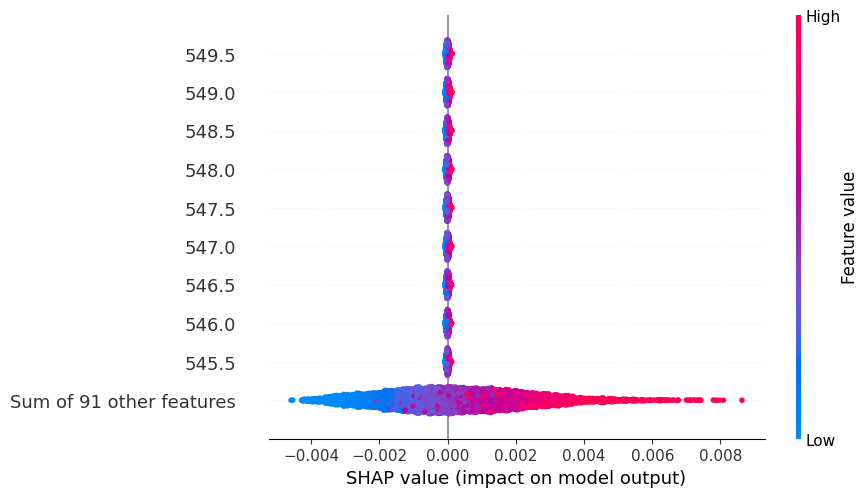

In [9]:
shap.plots.beeswarm(explanation[:, :100, 4])